# Use Case Notebook for Users working from a .CSV 

# Load data and region labels

In [3]:
import networkx as nx
import pandas as pd
import numpy as np
import pickle
import itertools
import brainmaptools as brainmap
import community # optional
import matplotlib.pyplot as plt #optional
#import brainx.modularity as md # 
%matplotlib inline

In [4]:
#Load data
data_young='/Users/inhauckchoi/Desktop/dataanalysis/YAnback+new.csv' #filename & path of rawdata file
keycodes_y=brainmap.build_keycodes_from_excel_csv(data_young) # load csv, builds a nested list

#Loads region names
data_young_df=pd.read_csv(data_young) 
regionlist_young=data_young_df.keys() # 
relabel_dict_ya={idx:x[:] for idx, x in enumerate(regionlist_young)} #dict for relabeling

In [5]:
#Load data
data_old='/Users/inhauckchoi/Desktop/dataanalysis/Oldernback+new.csv' #filename & path of rawdata file
keycodes_o=brainmap.build_keycodes_from_excel_csv(data_old) # load csv, builds a nested list

#Loads region names
data_older_df=pd.read_csv(data_old) 
regionlist_older=data_older_df.keys() # 
relabel_dict_o={idx:x[:] for idx, x in enumerate(regionlist_older)} #dict for relabeling

# Build Initial Graphs


In [6]:
#The raw adjacency (numpy) matrix with edges = number of studies coactive 
coactive_array_y=brainmap.build_n_coactives_array(keycodes_y)

#The normalized adjacency (numpy) matrix with edges = number of studies coactive/number of studies active
jaccard_array_y=brainmap.build_jaccard(keycodes_y)

In [7]:
#The raw adjacency (numpy) matrix with edges = number of studies coactive 
coactive_array_o=brainmap.build_n_coactives_array(keycodes_o)

#The normalized adjacency (numpy) matrix with edges = number of studies coactive/number of studies active
jaccard_array_o=brainmap.build_jaccard(keycodes_o)

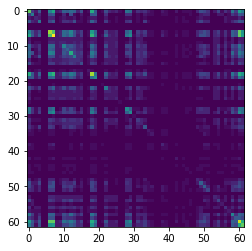

In [8]:
plt.imshow(coactive_array_y, interpolation='nearest') #coactive Young

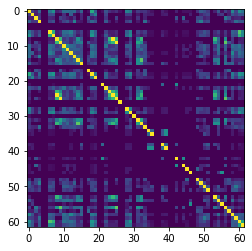

In [9]:
plt.imshow(jaccard_array_y, interpolation='nearest') #jaccard Young

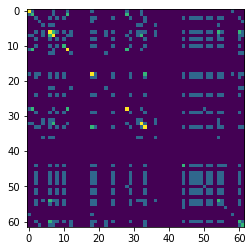

In [10]:
plt.imshow(coactive_array_o, interpolation='nearest') #coactive Older

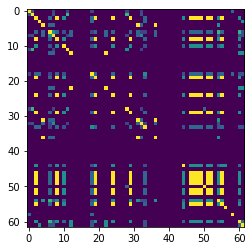

In [11]:
plt.imshow(jaccard_array_o, interpolation='nearest') #jaccard Older

#### Import into NetworkX graphs

In [12]:
#Raw data
G_y=nx.from_numpy_matrix(coactive_array_y) #import
G_y=nx.relabel_nodes(G_y,relabel_dict_ya) # apply regionlist
G_y.remove_edges_from(nx.selfloop_edges(G_y)) # remove self-loops
G_y=brainmap.remove_edgeless_nodes(G_y) # remove nodes w/o edges

In [13]:
to_remove=[] #cleans up data
degree = G_y.degree()
for x in degree: 
    if x[1]==0:
        to_remove.append(x[0]) 

G_y.remove_nodes_from(to_remove)


In [14]:
G_y.degree()

DegreeView({'Precentral_L': 49, 'Precentral_R': 31, 'Frontal_Sup_L': 32, 'Frontal_Sup_R': 36, 'Frontal_Mid_L': 45, 'Frontal_Mid_R': 47, 'Frontal_Mid_Orb_L': 25, 'Frontal_Mid_Orb_R': 33, 'Frontal_Inf_Oper_L': 41, 'Frontal_Inf_Oper_R': 37, 'Frontal_Inf_Tri_L': 44, 'Frontal_Inf_Tri_R': 41, 'Frontal_Inf_Orb_L': 30, 'Frontal_Inf_Orb_R': 43, 'Rolandic_Oper_R': 23, 'Supp_Motor_Area_L': 47, 'Supp_Motor_Area_R': 45, 'Olfactory_R': 6, 'Frontal_Sup_Medial_L': 42, 'Frontal_Sup_Medial_R': 26, 'Frontal_Mid_Orb_L.1': 25, 'Frontal_Mid_Orb_R.1': 33, 'Rectus_L': 1, 'Insula_L': 39, 'Insula_R': 42, 'Cingulum_Ant_L': 5, 'Cingulum_Ant_R': 36, 'Cingulum_Mid_L': 28, 'Cingulum_Mid_R': 33, 'Cingulum_Post_L': 23, 'Cingulum_Post_R': 19, 'ParaHippocampal_L': 22, 'ParaHippocampal_R': 19, 'Calcarine_L': 23, 'Cuneus_L': 20, 'Cuneus_R': 14, 'Lingual_L': 12, 'Occipital_Sup_L': 28, 'Occipital_Sup_R': 34, 'Occipital_Mid_L': 35, 'Occipital_Mid_R': 35, 'Occipital_Inf_R': 28, 'Fusiform_L': 37, 'Fusiform_R': 16, 'Postcentral

In [15]:
#Raw data
G_o=nx.from_numpy_matrix(coactive_array_o) #import
G_o=nx.relabel_nodes(G_o,relabel_dict_o) # apply regionlist
G_o.remove_edges_from(nx.selfloop_edges(G_o)) # remove self-loops
G_o=brainmap.remove_edgeless_nodes(G_o) # remove nodes w/o edges

In [16]:
to_remove=[] #cleans up data
degree = G_o.degree()
for x in degree: 
    if x[1]==0:
        to_remove.append(x[0]) 

G_o.remove_nodes_from(to_remove)

In [17]:
G_o.degree()

DegreeView({'Precentral_L': 7, 'Precentral_R': 5, 'Frontal_Sup_L': 18, 'Frontal_Sup_R': 3, 'Frontal_Sup_Orb_L': 6, 'Frontal_Mid_L': 26, 'Frontal_Mid_R': 14, 'Frontal_Mid_Orb_L': 18, 'Frontal_Inf_Oper_L': 18, 'Frontal_Inf_Oper_R': 5, 'Frontal_Inf_Tri_L': 5, 'Supp_Motor_Area_L': 22, 'Supp_Motor_Area_R': 18, 'Frontal_Sup_Medial_L': 5, 'Frontal_Mid_Orb_L.1': 18, 'Insula_L': 6, 'Insula_R': 18, 'Cingulum_Ant_R': 6, 'Cingulum_Mid_L': 11, 'Cingulum_Mid_R': 21, 'Hippocampus_L': 6, 'Cuneus_L': 19, 'Lingual_L': 18, 'Lingual_R': 18, 'Occipital_Sup_L': 18, 'Occipital_Sup_R': 18, 'Occipital_Mid_L': 1, 'Occipital_Mid_R': 18, 'Occipital_Inf_L': 18, 'Fusiform_L': 23, 'Fusiform_R': 18, 'Postcentral_L': 1, 'Parietal_Sup_L': 2, 'Parietal_Inf_L': 22, 'Parietal_Inf_R': 8})

### Draw a graph (no frills)

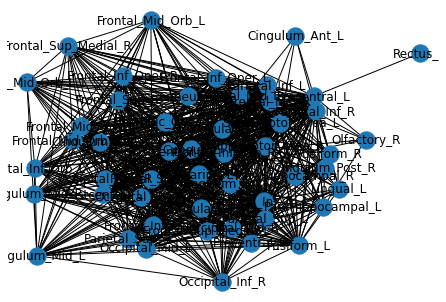

In [18]:
nx.draw_kamada_kawai(G_y, with_labels=True)

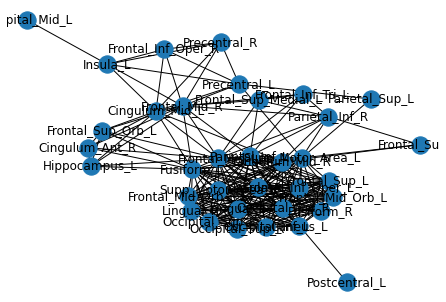

In [19]:
nx.draw_kamada_kawai(G_o, with_labels=True)

# Run Graph Metrics

In [20]:
graph_metrics={}
graph_metrics['young']=brainmap.run_weighted_metrics(G_y, 10)
graph_metrics['old']=brainmap.run_weighted_metrics(G_o, 10)


# Report this as difference in the Young vs Old: topologie of hubs

In [21]:
graph_metrics['young']['topdegree_cent'] 

[('Precentral_L', 0.9999999999999999),
 ('Supp_Motor_Area_L', 0.9591836734693877),
 ('Frontal_Mid_R', 0.9591836734693877),
 ('Parietal_Inf_L', 0.9387755102040816),
 ('Supp_Motor_Area_R', 0.9183673469387754),
 ('Frontal_Mid_L', 0.9183673469387754),
 ('Parietal_Sup_L', 0.8979591836734693),
 ('Frontal_Inf_Tri_L', 0.8979591836734693),
 ('Frontal_Inf_Orb_R', 0.8775510204081632),
 ('Parietal_Inf_R', 0.8571428571428571)]

In [22]:
G_o['Fusiform_R'].values

<bound method Mapping.values of AtlasView({'Frontal_Sup_L': {'weight': 1.0}, 'Frontal_Mid_L': {'weight': 1.0}, 'Frontal_Mid_Orb_L': {'weight': 1.0}, 'Frontal_Inf_Oper_L': {'weight': 1.0}, 'Supp_Motor_Area_L': {'weight': 1.0}, 'Supp_Motor_Area_R': {'weight': 1.0}, 'Frontal_Mid_Orb_L.1': {'weight': 1.0}, 'Insula_R': {'weight': 1.0}, 'Cingulum_Mid_R': {'weight': 1.0}, 'Cuneus_L': {'weight': 1.0}, 'Lingual_L': {'weight': 1.0}, 'Lingual_R': {'weight': 1.0}, 'Occipital_Sup_L': {'weight': 1.0}, 'Occipital_Sup_R': {'weight': 1.0}, 'Occipital_Mid_R': {'weight': 1.0}, 'Occipital_Inf_L': {'weight': 1.0}, 'Fusiform_L': {'weight': 1.0}, 'Parietal_Inf_L': {'weight': 1.0}})>

In [23]:
G_y['Fusiform_R'].values

<bound method Mapping.values of AtlasView({'Precentral_L': {'weight': 1.0}, 'Precentral_R': {'weight': 2.0}, 'Frontal_Mid_L': {'weight': 1.0}, 'Frontal_Mid_R': {'weight': 1.0}, 'Frontal_Inf_Oper_L': {'weight': 1.0}, 'Frontal_Inf_Tri_L': {'weight': 1.0}, 'Supp_Motor_Area_L': {'weight': 1.0}, 'Supp_Motor_Area_R': {'weight': 1.0}, 'Frontal_Sup_Medial_L': {'weight': 1.0}, 'Insula_L': {'weight': 1.0}, 'Lingual_L': {'weight': 1.0}, 'Occipital_Mid_R': {'weight': 1.0}, 'Fusiform_L': {'weight': 1.0}, 'Parietal_Sup_L': {'weight': 1.0}, 'Parietal_Inf_L': {'weight': 1.0}, 'Parietal_Inf_R': {'weight': 1.0}})>

In [24]:
graph_metrics['old']['topdegree_cent']

[('Frontal_Mid_L', 0.7647058823529411),
 ('Fusiform_L', 0.6764705882352942),
 ('Parietal_Inf_L', 0.6470588235294118),
 ('Supp_Motor_Area_L', 0.6470588235294118),
 ('Cingulum_Mid_R', 0.6176470588235294),
 ('Cuneus_L', 0.5588235294117647),
 ('Fusiform_R', 0.5294117647058824),
 ('Occipital_Inf_L', 0.5294117647058824),
 ('Occipital_Mid_R', 0.5294117647058824),
 ('Occipital_Sup_R', 0.5294117647058824)]

In [25]:
nx.write_gexf(G_y,"G_young.gexf")

In [26]:
nx.write_gexf(G_o,"G_old.gexf")

In [29]:
G_o.edge_attr_dict_factory(data=True)

{'data': True}

In [31]:
G_y.degree('Frontal_Inf_Orb_L') 

30

In [32]:
G_y.number_of_nodes()

50

In [33]:
k = 2
comp = nx.community.girvan_newman(G_o)
for communities in itertools.islice(comp, k):
    print(tuple(sorted(c) for c in communities))

(['Cingulum_Ant_R', 'Cingulum_Mid_L', 'Cingulum_Mid_R', 'Cuneus_L', 'Frontal_Inf_Oper_L', 'Frontal_Inf_Oper_R', 'Frontal_Inf_Tri_L', 'Frontal_Mid_L', 'Frontal_Mid_Orb_L', 'Frontal_Mid_Orb_L.1', 'Frontal_Mid_R', 'Frontal_Sup_L', 'Frontal_Sup_Medial_L', 'Frontal_Sup_Orb_L', 'Frontal_Sup_R', 'Fusiform_L', 'Fusiform_R', 'Hippocampus_L', 'Insula_L', 'Insula_R', 'Lingual_L', 'Lingual_R', 'Occipital_Inf_L', 'Occipital_Mid_R', 'Occipital_Sup_L', 'Occipital_Sup_R', 'Parietal_Inf_L', 'Parietal_Inf_R', 'Parietal_Sup_L', 'Postcentral_L', 'Precentral_L', 'Precentral_R', 'Supp_Motor_Area_L', 'Supp_Motor_Area_R'], ['Occipital_Mid_L'])
(['Cingulum_Ant_R', 'Cingulum_Mid_L', 'Cingulum_Mid_R', 'Cuneus_L', 'Frontal_Inf_Oper_L', 'Frontal_Inf_Oper_R', 'Frontal_Inf_Tri_L', 'Frontal_Mid_L', 'Frontal_Mid_Orb_L', 'Frontal_Mid_Orb_L.1', 'Frontal_Mid_R', 'Frontal_Sup_L', 'Frontal_Sup_Medial_L', 'Frontal_Sup_Orb_L', 'Frontal_Sup_R', 'Fusiform_L', 'Fusiform_R', 'Hippocampus_L', 'Insula_L', 'Insula_R', 'Lingual_L', 

In [34]:
weighted_metrics=brainmap.run_weighted_metrics(G_y, 10)

In [35]:
weighted_metrics['topdegrees']

[('Parietal_Inf_L', 296.0),
 ('Frontal_Mid_R', 289.0),
 ('Supp_Motor_Area_L', 283.0),
 ('Frontal_Mid_L', 270.0),
 ('Precentral_L', 263.0),
 ('Parietal_Inf_R', 223.0),
 ('Frontal_Inf_Tri_L', 203.0),
 ('Insula_R', 191.0),
 ('Frontal_Inf_Oper_L', 185.0),
 ('Parietal_Sup_L', 181.0)]

In [36]:
weighted_metrics['topdegree_cent']

[('Precentral_L', 0.9999999999999999),
 ('Supp_Motor_Area_L', 0.9591836734693877),
 ('Frontal_Mid_R', 0.9591836734693877),
 ('Parietal_Inf_L', 0.9387755102040816),
 ('Supp_Motor_Area_R', 0.9183673469387754),
 ('Frontal_Mid_L', 0.9183673469387754),
 ('Parietal_Sup_L', 0.8979591836734693),
 ('Frontal_Inf_Tri_L', 0.8979591836734693),
 ('Frontal_Inf_Orb_R', 0.8775510204081632),
 ('Parietal_Inf_R', 0.8571428571428571)]

In [37]:
weighted_metrics['topbetween_cent']

[('Rolandic_Oper_R', 0.05726589405156551),
 ('Frontal_Sup_L', 0.053707491044149284),
 ('Precentral_L', 0.053080408208839164),
 ('Cuneus_L', 0.05306510851278692),
 ('Postcentral_R', 0.0525883955711767),
 ('Calcarine_L', 0.050139269648160935),
 ('Cingulum_Post_L', 0.03875859047292228),
 ('Insula_L', 0.03244650833133528),
 ('ParaHippocampal_R', 0.03097865121297761),
 ('Cuneus_R', 0.02893173114788781)]